# Домашнее задание "Продвинутая оптимизация".

### Задание

При фиксированном `seed=42` поэкспериментируйте с параметрами алгоритма [differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html): strategy, popsize, mutation.

Постройте графики количества итераций (`nit`) оптимизации [функции ackley](https://en.wikipedia.org/wiki/Ackley_function) от значения параметра.

Подробнее о результате выдачи [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

In [ ]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 90
    nfev: 2793

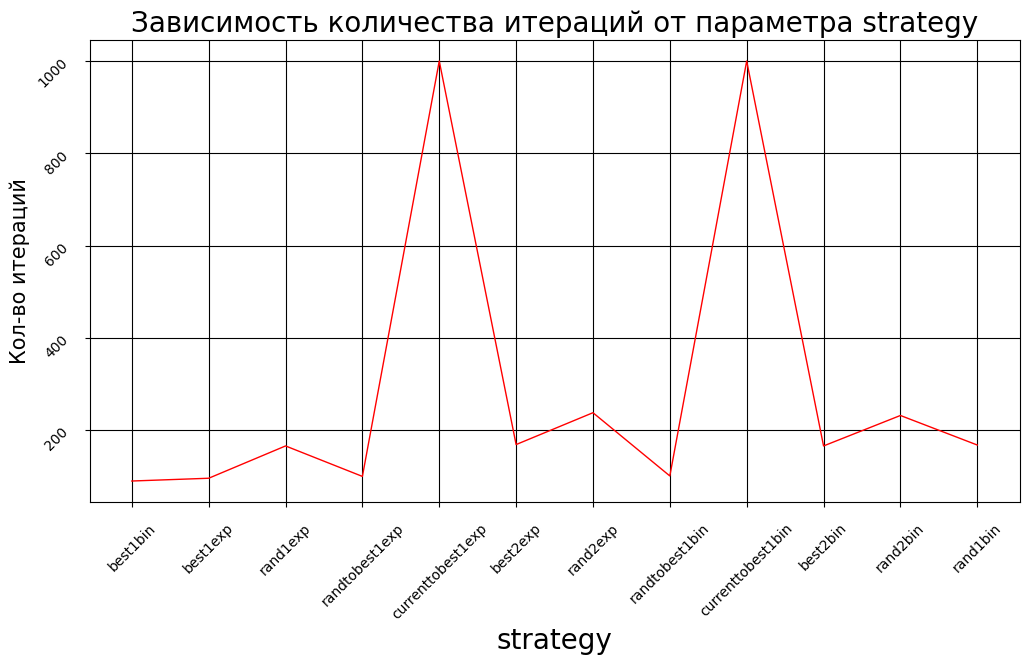

In [ ]:
res  =  []
param  =  []
for i in ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp','rand2exp','randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']:
    res.append(differential_evolution(ackley,  bounds,  strategy=i,  seed=42 )['nit'])
    param.append(i)

fig, ax = plt.subplots()
ax.plot(param,  res, color = 'r', linewidth = 1)
ax.grid(which='major', color = 'k')
ax.tick_params(axis = 'both', pad = 10, labelsize = 10, labelrotation = 45)

fig.set_figwidth(12)
fig.set_figheight(6)

plt.title('Зависимость количества итераций от параметра strategy', size=20)
plt.ylabel('Кол-во итераций', size = 15)
plt.xlabel('strategy', size = 20)
plt.show()

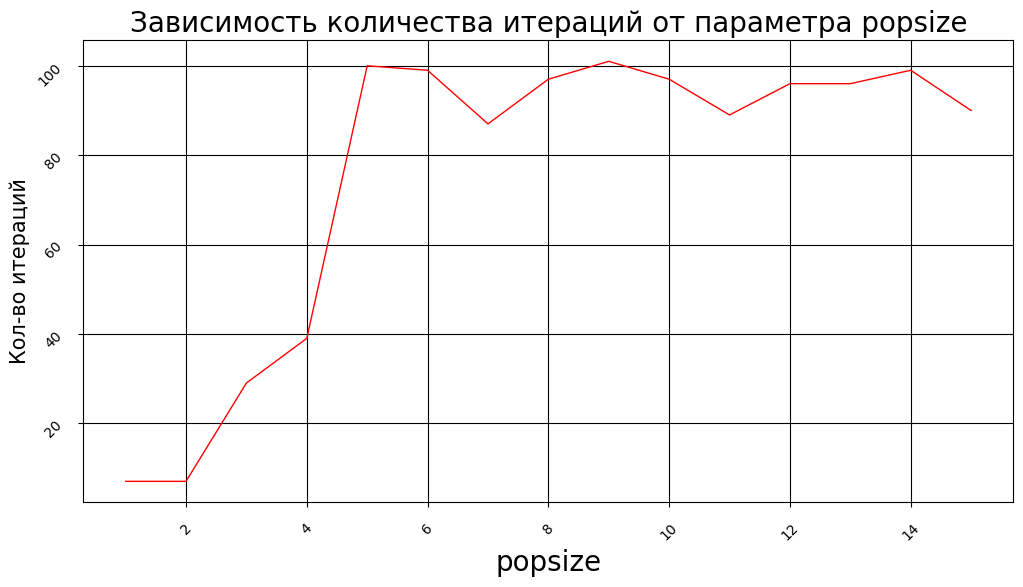

In [ ]:
res  =  []
param  =  []
for i in range(1, 16):
    res.append(differential_evolution(ackley,  bounds,  popsize=i,  seed=42 )['nit'])
    param.append(i)

fig, ax = plt.subplots()
ax.plot(param,  res, color = 'r', linewidth = 1)
ax.grid(which='major', color = 'k')
ax.tick_params(axis = 'both', pad = 10, labelsize = 10, labelrotation = 45)

fig.set_figwidth(12)
fig.set_figheight(6)

plt.title('Зависимость количества итераций от параметра popsize', size=20)
plt.ylabel('Кол-во итераций', size = 15)
plt.xlabel('popsize', size = 20)
plt.show()

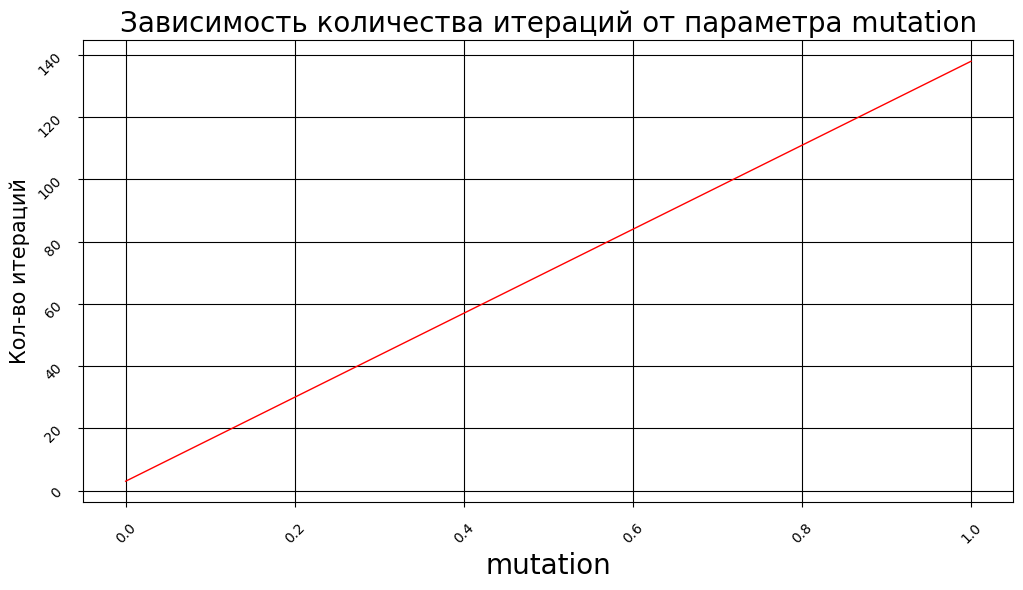

In [ ]:
res  =  []
param  =  []
for i in range(0, 2):
    res.append(differential_evolution(ackley,  bounds,  mutation=i,  seed=42 )['nit'])
    param.append(i)

fig, ax = plt.subplots()
ax.plot(param,  res, color = 'r', linewidth = 1)
ax.grid(which='major', color = 'k')
ax.tick_params(axis = 'both', pad = 10, labelsize = 10, labelrotation = 45)

fig.set_figwidth(12)
fig.set_figheight(6)

plt.title('Зависимость количества итераций от параметра mutation', size=20)
plt.ylabel('Кол-во итераций', size = 15)
plt.xlabel('mutation', size = 20)
plt.show()

### Дополнительное задание


Поэкспериментируйте с параметрами и оптимизацией через [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):

In [ ]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 4.440892098500626e-16
             x: [ 0.000e+00  0.000e+00]
           nit: 8
          nfev: 17
 final_simplex: (array([[ 0.000e+00,  0.000e+00],
                       [-1.607e-05, -8.453e-06],
                       [-1.404e-06, -3.113e-05]]), array([ 4.441e-16,  5.136e-05,  8.816e-05]))

In [ ]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0,  method='CG')
result_m

 message: Desired error not necessarily achieved due to precision loss.
 success: False
  status: 2
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 0
     jac: [ 2.828e+00  2.828e+00]
    nfev: 165
    njev: 51

Вы также можете поэкспериментировать с [другими методами оптимизации](https://habr.com/ru/company/prequel/blog/568496/), но это не обязательно для зачета.
